In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Project: Analysis on the Used Cars Data

## Table of Contents
- <a href = "#intro"> Introduction </a>
    - <a href = "#imports"> Notebook Imports </a>
    - <a href = "#functions"> Function Definitions </a>
- Data Wrangling
    - <a href = "#gathering"> Data Gathering </a>
    - <a href = "#assessing"> Data Assessing </a>
    - <a href = "#cleaning"> Data Cleaning </a>
- <a href = "#analysis"> EDA and Visualization </a>
- <a href = "#conclusions"> Conclusions </a>

<a id='intro'></a>
## Introduction

> Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen.

> Fields in the data set:
> - `dateCrawled` : when this ad was first crawled, all field-values are taken from this date
> - `name` : "name" of the car
> - `seller` : private or dealer
> - `offerType` : type of listing
> - `price` : the price on the ad to sell the car
> - `abtest` : whether the listing is included in an A/B test
> - `vehicleType` : the vehicle type
> - `yearOfRegistration` : at which year the car was first registered
> - `gearbox` : transmission type
> - `powerPS` : power of the car in PS
> - `model` : car model name
> - `kilometer` : how many kilometers the car has driven
> - `monthOfRegistration` : at which month the car was first registered
> - `fuelType` : type of fuel the car uses
> - `brand` : brand of the car
> - `notRepairedDamage` : if the car has a damage which is not repaired yet
> - `dateCreated` : the date for which the ad at ebay was created
> - `nrOfPictures` : number of pictures in the ad
> - `postalCode` : postal code for the location of the vehicle
> - `lastSeenOnline` : when the crawler saw this ad last online

> The content of the data is in German, so one has to translate it first if one can not speak German. The fields lastSeen and dateCrawled could be used to estimate how long a car will be at least online before it is sold.

Source: [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database)

<a id='imports'></a>
### Notebook Imports

In [2]:
import pandas as pd  # For Data Manipulation
import numpy as np  # For Array Manipulation

import calendar  # For Month Manipulation

import matplotlib.pyplot as matpy  # For Data Visualization
import seaborn as sb  # For Data Visualization
%matplotlib inline

## Data Wrangling

<a id='gathering'></a>
### Data Gathering

In [3]:
# Reading file
cars = pd.read_csv("autos.csv", encoding="Latin-1")

<a id='assessing'></a>
### Data Assessing

In [4]:
# Getting random fields to assess data
cars.sample(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
183001,2016-03-19 18:55:05,Opel_Corsa_1.2_16V,privat,Angebot,1950,test,kleinwagen,2002,manuell,75,corsa,125000,6,benzin,opel,nein,2016-03-19 00:00:00,0,31275,2016-04-07 06:16:41
308835,2016-03-21 20:55:35,Kombi_7_itzer,privat,Angebot,2800,control,kombi,2003,manuell,107,NaN,150000,3,diesel,peugeot,nein,2016-03-21 00:00:00,0,53347,2016-04-07 01:17:25
146044,2016-03-19 12:55:43,Volkswagen_Tiguan_2.0_TSI_4Motion_DSG_Sport_&_...,privat,Angebot,23760,test,suv,2012,automatik,179,tiguan,50000,11,benzin,volkswagen,nein,2016-03-19 00:00:00,0,83059,2016-03-28 14:15:29
325701,2016-03-09 10:38:11,Volkswagen_Golf_Cabrio,privat,Angebot,11500,control,cabrio,1988,manuell,98,golf,60000,6,benzin,volkswagen,nein,2016-03-09 00:00:00,0,47228,2016-03-26 04:18:20
44273,2016-03-22 19:54:00,VW_BUS_T3_Pritsche_Oldtimer,privat,Angebot,1700,test,andere,1982,manuell,60,transporter,125000,12,benzin,volkswagen,nein,2016-03-22 00:00:00,0,90530,2016-03-26 22:45:03


In [5]:
# Checking information of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [6]:
# Checking how many NA values are in the dataset
cars.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
# Getting a clearer picture of the missing values
cars_na = cars.isna().sum()
cars_na_perc = (cars_na * 100 / len(cars))
print(round(cars_na_perc,2).sort_values(ascending = False))

notRepairedDamage      19.40
vehicleType            10.19
fuelType                8.99
model                   5.51
gearbox                 5.44
kilometer               0.00
postalCode              0.00
nrOfPictures            0.00
dateCreated             0.00
brand                   0.00
monthOfRegistration     0.00
dateCrawled             0.00
name                    0.00
powerPS                 0.00
yearOfRegistration      0.00
abtest                  0.00
price                   0.00
offerType               0.00
seller                  0.00
lastSeen                0.00
dtype: float64


In [8]:
cars[["vehicleType", "gearbox", "model", "fuelType", "notRepairedDamage"]]

,vehicleType,gearbox,model,fuelType,notRepairedDamage
0,NaN,manuell,golf,benzin,NaN
1,coupe,manuell,NaN,diesel,ja
2,suv,automatik,grand,diesel,NaN
3,kleinwagen,manuell,golf,benzin,nein
4,kleinwagen,manuell,fabia,diesel,nein
...,...,...,...,...,...
371523,NaN,NaN,NaN,NaN,NaN
371524,cabrio,automatik,fortwo,benzin,nein
371525,bus,manuell,transporter,diesel,nein
371526,kombi,manuell,golf,diesel,NaN


In [9]:
cars["vehicleType"].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [10]:
cars["gearbox"].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [11]:
cars["model"].value_counts()

golf               30070
andere             26400
3er                20567
polo               13092
corsa              12573
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [12]:
cars["fuelType"].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [13]:
cars["notRepairedDamage"].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [14]:
cars["monthOfRegistration"].value_counts()

0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: monthOfRegistration, dtype: int64

In [15]:
cars[cars["monthOfRegistration"] == 0]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06
15,2016-03-11 21:39:15,KA_Lufthansa_Edition_450_VB,privat,Angebot,450,test,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN,2016-03-11 00:00:00,0,24148,2016-03-19 08:46:47
16,2016-04-01 12:46:46,Polo_6n_1_4,privat,Angebot,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN,2016-04-01 00:00:00,0,38871,2016-04-01 12:46:46
36,2016-03-11 11:50:37,Opel_Kadett_E_CC,privat,Angebot,1600,control,andere,1991,manuell,75,kadett,70000,0,NaN,opel,NaN,2016-03-11 00:00:00,0,2943,2016-04-07 03:46:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371460,2016-04-03 13:46:24,Polo_g40_auch_Tausch_vag...no_vr6_gti_1.8t,privat,Angebot,3500,control,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN,2016-04-03 00:00:00,0,74579,2016-04-05 12:44:38
371473,2016-03-15 19:57:11,Subaru_Allrad,privat,Angebot,400,control,kombi,1991,manuell,0,legacy,150000,0,benzin,subaru,NaN,2016-03-15 00:00:00,0,24558,2016-03-19 15:49:00
371482,2016-03-31 19:36:18,Peugeot_206,privat,Angebot,1300,control,kleinwagen,1999,manuell,75,2_reihe,125000,0,NaN,peugeot,NaN,2016-03-31 00:00:00,0,35102,2016-04-06 13:44:44
371486,2016-03-30 20:55:30,Zu_verkaufen,privat,Angebot,350,control,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,2016-03-30 00:00:00,0,25436,2016-04-07 13:50:41


In [16]:
cars["nrOfPictures"].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

In [17]:
# Checking for duplicated values
cars.duplicated().any().sum()

1

In [18]:
cars["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [19]:
cars["offerType"].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [20]:
cars["yearOfRegistration"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [21]:
print(cars["price"].describe())
print()
cars["price"].value_counts()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64



0         10778
500        5670
1500       5394
1000       4649
1200       4594
          ...  
349000        1
8889          1
3440          1
1997          1
10985         1
Name: price, Length: 5597, dtype: int64

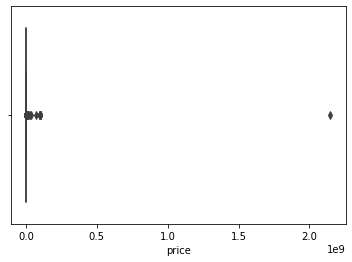

In [22]:
sb.boxplot(x="price", data=cars)
matpy.show()

In [23]:
cars.describe(include="all")

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


##### Quality Issues

- camelCase column names
- Capitalize the names of the cars and their brand
- Replace underscore with spaces in the `name` and `brand` column 
- Incorrect data types
- Drop duplicates
- Remove the `nrOfPictures` column as there is only 0 in it
- Change the `monthOfRegistration` values to their correct corresponding months
- Investigate `monthOfRegistration` with empty values
- Chaning German to English for some columns
- Investigate `yearOfRegistration` column
- Remove outliers in `price` column

<a id='cleaning'></a>
### Data Cleaning

In [24]:
cars_clean = cars.copy()

#### Renaming Columns
Changing camelCase column names to snake_case to increase code efficiency

In [25]:
cars_clean.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [26]:
cars_clean.rename({
    "dateCrawled": "date_crawled",
    "offerType": "offer_type",
    "vehicleType": "vehicle_type",
    "yearOfRegistration": "year_of_registration",
    "powerPS": "power_ps",
    "kilometer": "mileage_km",
    "monthOfRegistration": "month_of_registration",
    "fuelType": "fuel_type",
    "notRepairedDamage": "not_repaired_damage",
    "dateCreated": "date_created",
    "nrOfPictures": "num_of_pictures",
    "postalCode": "postal_code",
    "lastSeen": "last_seen"
}, axis=1, inplace=True)

In [27]:
cars_clean.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'year_of_registration', 'gearbox', 'power_ps', 'model',
       'mileage_km', 'month_of_registration', 'fuel_type', 'brand',
       'not_repaired_damage', 'date_created', 'num_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

#### Capitalizing the names and brands of the cars

In [28]:
cars_clean["name"] = cars_clean["name"].apply(lambda x: x.title())

In [29]:
cars_clean["brand"] = cars_clean["brand"].apply(lambda x: x.title())

In [30]:
cars_clean[["name", "brand"]]

,name,brand
0,Golf_3_1.6,Volkswagen
1,A5_Sportback_2.7_Tdi,Audi
2,"Jeep_Grand_Cherokee_""Overland""",Jeep
3,Golf_4_1_4__3Türer,Volkswagen
4,Skoda_Fabia_1.4_Tdi_Pd_Classic,Skoda
...,...,...
371523,Suche_T4___Vito_Ab_6_Sitze,Sonstige_Autos
371524,Smart_Smart_Leistungssteigerung_100Ps,Smart
371525,Volkswagen_Multivan_T4_Tdi_7Dc_Uy2,Volkswagen
371526,Vw_Golf_Kombi_1_9L_Tdi,Volkswagen


#### Replace underscore with spaces in the `name` and `brand` column
Removing the underscores in car and brand names

In [31]:
cars_clean["name"] = cars_clean["name"].apply(lambda x: x.replace("_", " "))

In [32]:
cars_clean["brand"] = cars_clean["brand"].apply(lambda x: x.replace("_", " "))

In [33]:
cars_clean[["name", "brand"]]

,name,brand
0,Golf 3 1.6,Volkswagen
1,A5 Sportback 2.7 Tdi,Audi
2,"Jeep Grand Cherokee ""Overland""",Jeep
3,Golf 4 1 4 3Türer,Volkswagen
4,Skoda Fabia 1.4 Tdi Pd Classic,Skoda
...,...,...
371523,Suche T4 Vito Ab 6 Sitze,Sonstige Autos
371524,Smart Smart Leistungssteigerung 100Ps,Smart
371525,Volkswagen Multivan T4 Tdi 7Dc Uy2,Volkswagen
371526,Vw Golf Kombi 1 9L Tdi,Volkswagen


#### Changing incorrect datatypes
Changing the `date_crawled`, `date_created`, `last_seen` columns to datetime formats and the `postal_code` to an object

In [34]:
cars_clean.date_crawled = pd.to_datetime(cars_clean.date_crawled)

In [35]:
cars_clean.date_created = pd.to_datetime(cars_clean.date_created)

In [36]:
cars_clean.last_seen = pd.to_datetime(cars_clean.last_seen)

In [37]:
cars_clean["postal_code"] = cars_clean["postal_code"].astype(object)

In [38]:
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date_crawled           371528 non-null  datetime64[ns]
 1   name                   371528 non-null  object        
 2   seller                 371528 non-null  object        
 3   offer_type             371528 non-null  object        
 4   price                  371528 non-null  int64         
 5   abtest                 371528 non-null  object        
 6   vehicle_type           333659 non-null  object        
 7   year_of_registration   371528 non-null  int64         
 8   gearbox                351319 non-null  object        
 9   power_ps               371528 non-null  int64         
 10  model                  351044 non-null  object        
 11  mileage_km             371528 non-null  int64         
 12  month_of_registration  371528 non-null  int6

#### Dropping duplicates
Removing all duplicates and it turns out there were only 4 duplicates which is good

In [39]:
print(f"Shape of data before dropping duplicates: {cars_clean.shape}")
cars_clean = cars_clean.drop_duplicates()
print(f"Shape of data after dropping duplicates: {cars_clean.shape}")

Shape of data before dropping duplicates: (371528, 20)
Shape of data after dropping duplicates: (371524, 20)


#### Removing `num_of_pictures` column
As there is only one value (0), this column is totally not needed

In [40]:
cars_clean.drop("num_of_pictures", axis=1, inplace=True)

In [41]:
cars_clean.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'year_of_registration', 'gearbox', 'power_ps', 'model',
       'mileage_km', 'month_of_registration', 'fuel_type', 'brand',
       'not_repaired_damage', 'date_created', 'postal_code', 'last_seen'],
      dtype='object')

#### Changing the `month_of_registration` values
Changing numeric values to corresponding months

In [42]:
cars_clean["month_of_registration"].mask(cars_clean["month_of_registration"] == 0, np.nan, inplace=True)

In [43]:
print(f"Number of data before dropping NAs: {cars_clean.shape}")
cars_clean.dropna(subset = ["month_of_registration"], inplace = True)
print(f"Number of data before dropping NAs: {cars_clean.shape}")

Number of data before dropping NAs: (371524, 19)
Number of data before dropping NAs: (333849, 19)


In [44]:
cars_clean["month_of_registration"] = cars_clean["month_of_registration"].astype("int64")

In [45]:
cars_clean["month_of_registration"].info()

<class 'pandas.core.series.Series'>
Int64Index: 333849 entries, 1 to 371527
Series name: month_of_registration
Non-Null Count   Dtype
--------------   -----
333849 non-null  int64
dtypes: int64(1)
memory usage: 5.1 MB


In [46]:
cars_clean["month_of_registration"] = cars_clean["month_of_registration"].apply(lambda x: calendar.month_abbr[x])

In [47]:
cars_clean["month_of_registration"]

1         May
2         Aug
3         Jun
4         Jul
5         Oct
         ... 
371523    Jan
371524    Mar
371525    Mar
371526    Jun
371527    Aug
Name: month_of_registration, Length: 333849, dtype: object

In [48]:
cars_clean[cars_clean["month_of_registration"] == 0]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,mileage_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen


In [49]:
cars_clean.iloc[[0]]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,mileage_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
1,2016-03-24 10:58:45,A5 Sportback 2.7 Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,May,diesel,Audi,ja,2016-03-24,66954,2016-04-07 01:46:50


#### Standardization of Language
Changing German to English

In [50]:
# Changing the `seller` column
cars_clean["seller"].mask(cars_clean["seller"] == "privat", "private", inplace=True)
cars_clean["seller"].mask(cars_clean["seller"] == "gewerblich", "commercial", inplace=True)

# Changing the `offer_type` column
cars_clean["offer_type"].mask(cars_clean["offer_type"] == "Angebot", "offer", inplace=True)
cars_clean["offer_type"].mask(cars_clean["offer_type"] == "Gesuch", "request", inplace=True)

# Changing the `gearbox` column
cars_clean["gearbox"].mask(cars_clean["gearbox"] == "manuell", "manual", inplace=True)
cars_clean["gearbox"].mask(cars_clean["gearbox"] == "automatik", "automatic", inplace=True)

# Changing the `not_repaired_damage` column
cars_clean["not_repaired_damage"].mask(cars_clean["not_repaired_damage"] == "ja", "yes", inplace=True)
cars_clean["not_repaired_damage"].mask(cars_clean["not_repaired_damage"] == "nein", "no", inplace=True)

# Changing the `fuel_type` column
cars_clean["fuel_type"].mask(cars_clean["fuel_type"] == "benzin", "petrol", inplace=True)
cars_clean["fuel_type"].mask(cars_clean["fuel_type"] == "andere", "others", inplace=True)
cars_clean["fuel_type"].mask(cars_clean["fuel_type"] == "elektro", "electric", inplace=True)

# Changing the `vehicle_type` column
cars_clean["vehicle_type"].mask(cars_clean["vehicle_type"] == "kleinwagen", "small car", inplace=True)
cars_clean["vehicle_type"].mask(cars_clean["vehicle_type"] == "cabrio", "convertible", inplace=True)
cars_clean["vehicle_type"].mask(cars_clean["vehicle_type"] == "kombi", "station wagon", inplace=True)
cars_clean["vehicle_type"].mask(cars_clean["vehicle_type"] == "andere", "others", inplace=True)

In [51]:
cars_clean[["seller", "offer_type", "gearbox", "not_repaired_damage", "fuel_type", "vehicle_type"]]

,seller,offer_type,gearbox,not_repaired_damage,fuel_type,vehicle_type
1,private,offer,manual,yes,diesel,coupe
2,private,offer,automatic,NaN,diesel,suv
3,private,offer,manual,no,petrol,small car
4,private,offer,manual,no,diesel,small car
5,private,offer,manual,yes,petrol,limousine
...,...,...,...,...,...,...
371523,private,offer,NaN,NaN,NaN,NaN
371524,private,offer,automatic,no,petrol,convertible
371525,private,offer,manual,no,diesel,bus
371526,private,offer,manual,NaN,diesel,station wagon


#### Investigate and clean the `year_of_registration` column
I noticed the minimum year was `1000` which is inaccurate also the maximum year was `9999` which is also inaccurate. The 
project actually deals with the year `1900`-`2016`

In [52]:
print(f"Shape of data before removing incorrect data: {cars_clean.shape}")
cars_clean = cars_clean[cars_clean["year_of_registration"].between(1900, 2016)]
print(f"Shape of data after removing incorrect data: {cars_clean.shape}")

Shape of data before removing incorrect data: (333849, 19)
Shape of data after removing incorrect data: (322861, 19)


In [53]:
cars_clean["year_of_registration"].describe()

count    322861.000000
mean       2003.101827
std           7.056765
min        1910.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2016.000000
Name: year_of_registration, dtype: float64

In [54]:
cars_clean["year_of_registration"].dtype

dtype('int64')

#### Removing outliers in the `price` column

In [55]:
before = cars_clean.shape[0]
print(f"Number of data before removing outliers: {cars_clean.shape}")
# Using IQR in price column
quarter_1 = 1150
quarter_3 = 7200

iqr = quarter_3 - quarter_1 

#finding lower and upper bound
lower = quarter_1 - (10 * iqr)
upper = quarter_3 + (10 * iqr)

#removing outlier using the bounds
cars_clean = cars_clean[cars_clean["price"].between(lower, upper)]

after = cars_clean.shape[0]
print(f"Number of data after removing outliers: {cars_clean.shape}")
print(f"Number of rows removed = {before - after}")

Number of data before removing outliers: (322861, 19)
Number of data after removing outliers: (322077, 19)
Number of rows removed = 784


In [56]:
print(cars_clean["price"].describe())
print()
cars_clean["price"].value_counts()

count    322077.000000
mean       5977.136082
std        7279.125424
min           0.000000
25%        1350.000000
50%        3350.000000
75%        7900.000000
max       67500.000000
Name: price, dtype: float64



0        5833
500      4446
1500     4438
2500     3768
1200     3739
         ... 
13986       1
24488       1
56590       1
6001        1
10985       1
Name: price, Length: 5089, dtype: int64

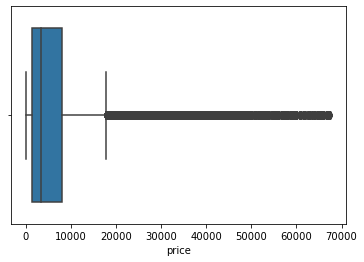

In [57]:
sb.boxplot(x="price", data=cars_clean)
matpy.show()

<a id='analysis'></a>
## EDA and Visualization

### Relationship Between Price, Brand and Mileage

In [58]:
top_brands = cars_clean["brand"].value_counts(normalize = True, sort = True).index[0:20]
top_brands = list(top_brands)
top_brands

['Volkswagen',
 'Bmw',
 'Opel',
 'Mercedes Benz',
 'Audi',
 'Ford',
 'Renault',
 'Peugeot',
 'Fiat',
 'Seat',
 'Skoda',
 'Mazda',
 'Smart',
 'Citroen',
 'Nissan',
 'Toyota',
 'Hyundai',
 'Mini',
 'Volvo',
 'Sonstige Autos']

In [59]:
mean_brand_prices = {}  # Dictionary to hold brands and their mean prices
mean_brand_mileage = {}  # Dictionary to hold brands and their mean mileage

# Looping over the brands to get their mean prices and mean mileage
for brands in top_brands:
    brand_price = cars_clean[cars_clean["brand"] == brands]["price"]
    brand_mileage = cars_clean[cars_clean["brand"] == brands]["mileage_km"]
    
    mean_price = round(brand_price.mean(), 2)
    mean_mileage = round(brand_mileage.mean(), 2)
    
    mean_brand_prices[brands] = mean_price
    mean_brand_mileage[brands] = mean_mileage
    
mean_price_series = pd.Series(mean_brand_prices)
df = pd.DataFrame(mean_price_series, columns=["mean_price"])

mean_mileage_series = pd.Series(mean_brand_mileage)
df["mean_mileage"] = mean_mileage_series

df = df.reset_index()
df.columns = "brands", "mean_price", "mean_mileage"
df

,brands,mean_price,mean_mileage
0,Volkswagen,5601.09,128059.81
1,Bmw,8552.95,132864.40
2,Opel,3089.13,128415.87
3,Mercedes Benz,8368.29,130931.73
4,Audi,9248.38,129151.14
5,Ford,3835.92,123556.10
6,Renault,2509.98,127414.96
7,Peugeot,3363.50,123989.94
8,Fiat,3014.60,115686.81
9,Seat,4637.07,119900.82


#### Brand and Price

In [60]:
price_df = df.sort_values(by=["mean_price"], ascending=False)
price_df

,brands,mean_price,mean_mileage
19,Sonstige Autos,10572.34,90903.10
17,Mini,10100.58,93221.08
4,Audi,9248.38,129151.14
1,Bmw,8552.95,132864.40
3,Mercedes Benz,8368.29,130931.73
10,Skoda,6600.98,113419.35
16,Hyundai,5700.68,103378.21
0,Volkswagen,5601.09,128059.81
18,Volvo,5417.91,138179.38
15,Toyota,5371.76,116662.79


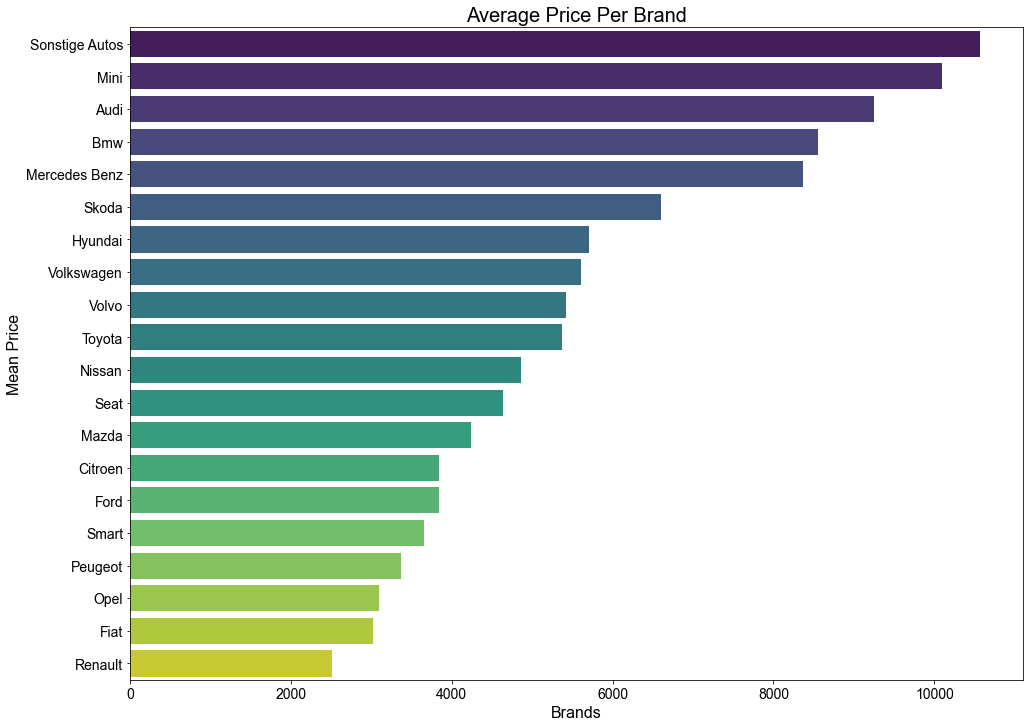

In [61]:
matpy.figure(figsize=(16, 12))
matpy.title("Average Price Per Brand", fontsize=20)

sb.barplot(x="mean_price", y="brands", data=price_df, palette="viridis")

matpy.xlabel("Brands", fontsize=16)
matpy.xticks(fontsize=14)
matpy.ylabel("Mean Price", fontsize=16)
matpy.yticks(fontsize=14)
sb.set_style("dark")

matpy.show()

#### Brand and Mileage

In [62]:
mileage_df = df.sort_values(by=["mean_mileage"], ascending=False)
mileage_df

,brands,mean_price,mean_mileage
18,Volvo,5417.91,138179.38
1,Bmw,8552.95,132864.40
3,Mercedes Benz,8368.29,130931.73
4,Audi,9248.38,129151.14
2,Opel,3089.13,128415.87
0,Volkswagen,5601.09,128059.81
6,Renault,2509.98,127414.96
11,Mazda,4234.23,125305.03
7,Peugeot,3363.50,123989.94
5,Ford,3835.92,123556.10


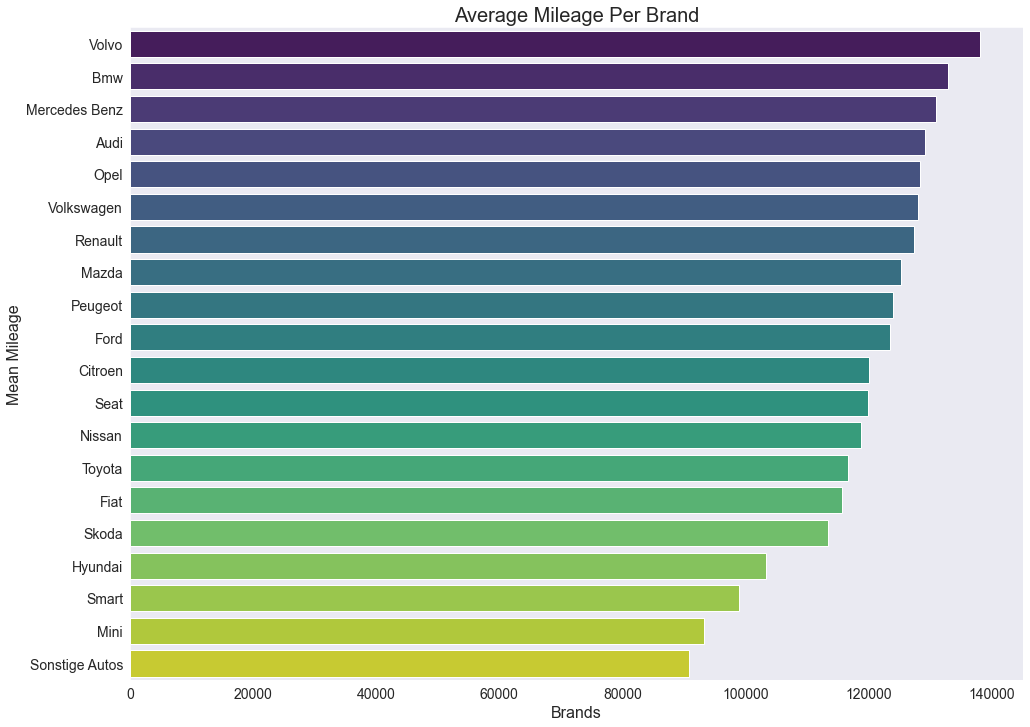

In [63]:
matpy.figure(figsize=(16, 12))
matpy.title("Average Mileage Per Brand", fontsize=20)

sb.barplot(x="mean_mileage", y="brands", data=mileage_df, palette="viridis")

matpy.xlabel("Brands", fontsize=16)
matpy.xticks(fontsize=14)
matpy.ylabel("Mean Mileage", fontsize=16)
matpy.yticks(fontsize=14)
sb.set_style("dark")

matpy.show()

#### Price and Mileage

In [64]:
corr = mileage_df["mean_price"].corr(df["mean_mileage"])
corr

-0.30300710407943654

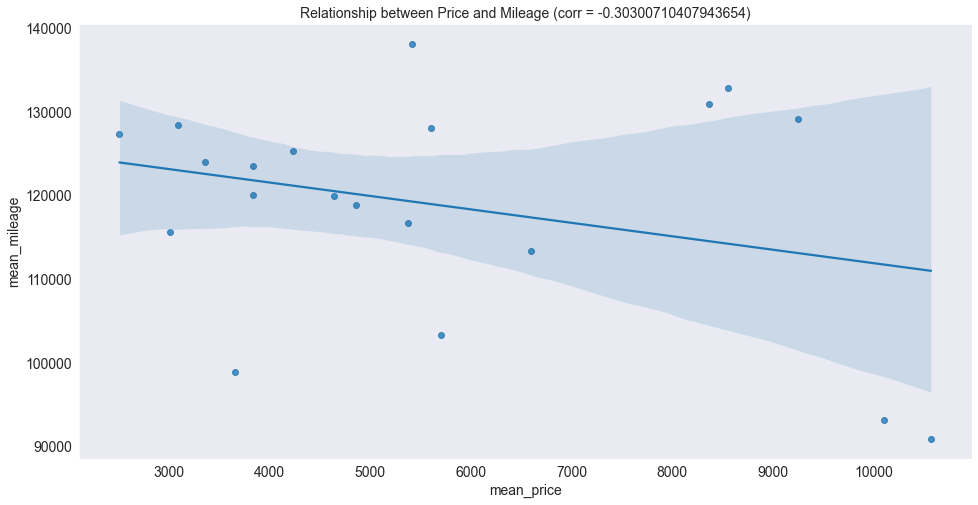

In [65]:
matpy.figure(figsize = (16, 8))
matpy.title(f"Relationship between Price and Mileage (corr = {corr})", fontsize = 14)

matpy.xlabel("Mean Price", fontsize = 14)
matpy.xticks(fontsize = 14)
matpy.ylabel("Mean Mileage", fontsize = 14)
matpy.yticks(fontsize = 14)

sb.regplot(data=df, x="mean_price", y="mean_mileage")
matpy.show()

#### Grouping Mileage

In [66]:
# Grouping mileage into categories: low mileage, average mileage, high mileage
mileage_range = []
for value in cars_clean["mileage_km"]:
    if value < 50000 : mileage_range.append('low mileage')
    elif value < 90000 : mileage_range.append('average mileage')
    else : mileage_range.append('high mileage')
cars_clean["mileage_range"] = mileage_range
cars_clean.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,mileage_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen,mileage_range
1,2016-03-24 10:58:45,A5 Sportback 2.7 Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,May,diesel,Audi,yes,2016-03-24,66954,2016-04-07 01:46:50,high mileage
2,2016-03-14 12:52:21,"Jeep Grand Cherokee ""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,Aug,diesel,Jeep,NaN,2016-03-14,90480,2016-04-05 12:47:46,high mileage
3,2016-03-17 16:54:04,Golf 4 1 4 3Türer,private,offer,1500,test,small car,2001,manual,75,golf,150000,Jun,petrol,Volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,high mileage
4,2016-03-31 17:25:20,Skoda Fabia 1.4 Tdi Pd Classic,private,offer,3600,test,small car,2008,manual,69,fabia,90000,Jul,diesel,Skoda,no,2016-03-31,60437,2016-04-06 10:17:21,high mileage
5,2016-04-04 17:36:23,Bmw 316I E36 Limousine Bastlerfahrzeug Ex...,private,offer,650,test,limousine,1995,manual,102,3er,150000,Oct,petrol,Bmw,yes,2016-04-04,33775,2016-04-06 19:17:07,high mileage


In [67]:
top_mileage = cars_clean["mileage_range"].value_counts(normalize = True, sort = True).index[0:15]
top_mileage = list(top_mileage)
top_mileage

['high mileage', 'average mileage', 'low mileage']

In [68]:
# Creating a price to mileage_range table
mileage_price = {}
for val in top_mileage:
    row = cars_clean[cars_clean["mileage_range"]== val]
    mean = round(row['price'].mean(), 2)
    mileage_price[val] = mean
    
mp_series = pd.Series(mileage_price)
df = pd.DataFrame(mp_series)
df = df.reset_index()
df.columns = 'milage', 'average_price'
df = df.sort_values(by = 'average_price', ascending = False)
df

,milage,average_price
2,low mileage,14301.69
1,average mileage,11069.02
0,high mileage,4616.96


### Most Common Brands and Models

In [69]:
# Counting the brands and models
brand_model = cars_clean[['brand', 'model']].value_counts()
brand_model

# Convert to Series
brand_model_series = pd.Series(brand_model.head(30))

# convert to DataFrame
brand_model_df = pd.DataFrame(brand_model_series).reset_index()
brand_model_df.columns = 'brand', 'model', 'count'
brand_model_df

,brand,model,count
0,Volkswagen,golf,25452
1,Bmw,3er,18345
2,Volkswagen,polo,11020
3,Opel,corsa,10576
4,Opel,astra,9272
5,Audi,a4,9258
6,Volkswagen,passat,9087
7,Mercedes Benz,c_klasse,8088
8,Bmw,5er,7913
9,Mercedes Benz,e_klasse,6938


### State of Car to Price

In [70]:
damaged = cars_clean[cars_clean['not_repaired_damage'] == 'yes']['price'].mean()
undamaged = cars_clean[cars_clean['not_repaired_damage'] == 'no']['price'].mean()
difference = (undamaged - damaged) / undamaged * 100

print(f"Undamaged cars sell higher with an average of {difference:.2f}%")

Undamaged cars sell higher with an average of 66.97%


<a id='conclusions'></a>
## Conclusions

> The 15 cars with the most listing shows Audi, BMW and Mercedes Benz as the expensive cars, Volkswagen as averagely expensive and Ford, Fiat and Opel as cheap cars with Audi being the most expensive. There seem to be connection between price and mileage, as the price decreases the mileage decreases so cars with more mileage are more expensive. It also shows that cars with lower mileage are more expensive than cars with higher mileage and that cars with repaired damages are more expensive than cars with damages unrepaired. I also observed a weak negative correlation between mileage and price. Overall, my analysis provides some basic insights into the used car market in Germany. 